### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [29]:
X_test
y

array([ 8.33448457e+01,  4.77539837e+01,  2.66352862e-02,  1.22690761e+02,
       -5.77153801e+00, -1.56483934e+02, -5.52555366e+01,  3.07987684e+01,
       -1.69940639e+01, -5.63502574e+01, -1.84431633e+02,  8.56011139e+01,
        1.36489172e+02, -1.67194108e+02,  1.73261512e+01,  6.74504234e+01,
       -4.84580304e+01,  2.96788589e+01, -1.73274522e+02, -6.66296333e+01,
       -7.81136180e+00, -7.94210842e+01, -1.20995302e+02,  1.78426827e+02,
        1.03430635e+02,  4.09960819e+01,  9.39541011e+01,  3.65984129e+01,
       -2.61832451e+02, -1.17161342e+02, -4.19224399e+01, -4.50040488e+01,
        2.53143963e+02,  5.20236362e+01,  1.72631259e+02, -1.27731305e+02,
        1.50482514e+02,  1.12275673e+02,  1.15330813e+02, -1.44509355e+02,
        2.31529871e+02,  1.08328931e+02,  1.72296449e+02,  6.20762708e+01,
        1.00973347e+00,  8.65118988e+01, -1.40008967e+02,  1.77600209e+01,
        9.59100985e+01,  8.72167836e+01, -1.44507264e+02,  1.56001491e+02,
        7.60500665e+01, -

In [3]:
y_test

array([ 231.52987097, -127.73130463,   82.03512178, -114.56084875,
        -40.94506552,  -46.3723945 ,   17.14558018,   36.59841286,
       -144.50935547,  172.29644855,   52.02363624,  150.91337265,
         24.4817991 ,   77.51790564,   62.62990566,   76.3859825 ,
        195.3197199 ,   47.75398372,   78.13610249,  -76.28526953])

In [33]:
print(len(X[0]))
print(y.shape[0])
len(X)

5
100


100

### Visualizing the data  
Use `matplotlib` to visualize the given data.

In [4]:
X_test[0,1]


1.9378714030365307

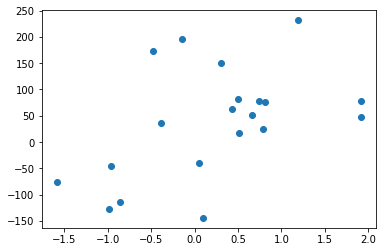

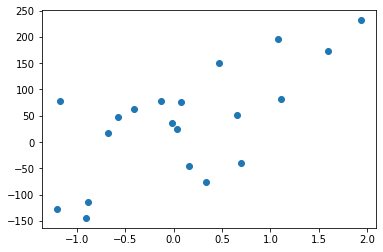

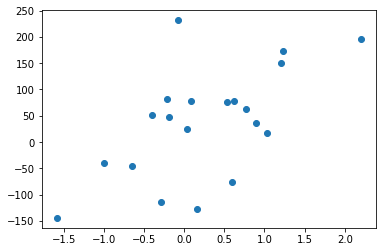

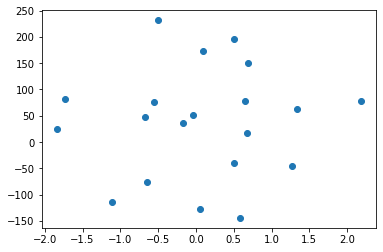

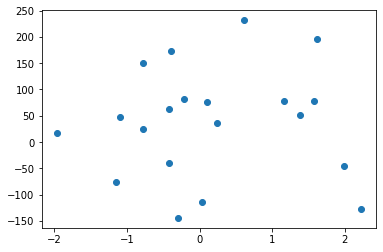

In [5]:
import matplotlib.pyplot as plt

# Your code here
plt.plot(X_test[0:,0],y_test,'o')
plt.show()
plt.plot(X_test[0:,1],y_test,'o')
plt.show()
plt.plot(X_test[0:,2],y_test,'o')
plt.show()
plt.plot(X_test[0:,3],y_test,'o')
plt.show()
plt.plot(X_test[0:,4],y_test,'o')
plt.show()

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [50]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001,n_iters=1000,weights=np.random.randn(5,1),bias=0):
            self.learning_rate=learning_rate
            self.n_iters=n_iters
            self.weights=np.random.randn(5,1)
            self.bias=bias
    pass  

    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
      for i in range(1,self.n_iters+1):
        y1=np.dot(X,self.weights)+self.bias
        m=y.shape[0]
        #J=(1/(2*m))*np.sum(np.square(y1-y))
        dy1=(1/m)*(y1-y)
        dw=np.dot(X.T,dy1)
        db=np.sum(dy1)
        self.weights=self.weights-self.learning_rate*dw
        self.bias=self.bias-self.learning_rate*db
        # Gradient Descent code goes here

    pass  
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
      return np.dot(X,self.weights)+self.bias
        # Code goes here
    pass      

### Initializing, Training & Predictions

In [57]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead
regressor.fit(X_train,y_train)
# Call the fit method on the object to train (pass appropriate part of dataset)


# Now, let's see our what our model predicts
predictions = regressor.predict(X_test)
y_pred=predictions
print(y_pred)
y_pred.shape[0]

[[  8.91022182  19.54019162   5.86612168 ...  17.50428616   8.95104754
   12.62005716]
 [ 29.42141132 -18.71768331  43.20698434 ...  -9.49784097  29.23652715
   12.62097656]
 [ 22.49812955  -5.23890449  30.44117275 ...   0.07343224  22.39160203
   12.81796763]
 ...
 [  7.95690914  26.19384207   2.73440605 ...  22.70101264   8.02695035
   14.32155734]
 [ 10.01283856  19.03428328   7.42937109 ...  17.30645066  10.04748654
   13.16130229]
 [ 22.34731709   0.94238103  28.47703996 ...   5.04196241  22.26510878
   14.87704299]]


20

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [58]:
def mean_squared_error(y_true, y_pred):
  return np.mean(np.square(np.subtract(y_true,y_pred)))
       # return the mean squared error
pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
   return 1-((np.sum(np.square(y_true-y_pred)))/(np.sum(np.square(y_true-(np.mean(y_true))))))
      # return the r2 score
pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_test,y_pred) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 1.3361849775399093
Accuracy: 0.9941399586591607
